<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных-и-разделение-выборки" data-toc-modified-id="Загрузка-исходных-данных-и-разделение-выборки-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка исходных данных и разделение выборки</a></span><ul class="toc-item"><li><span><a href="#Загрузка-исходных-данных" data-toc-modified-id="Загрузка-исходных-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка исходных данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Разделение-выборки" data-toc-modified-id="Разделение-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение выборки</a></span></li></ul></li><li><span><a href="#Построение-модели-&quot;Решающее-древо&quot;" data-toc-modified-id="Построение-модели-&quot;Решающее-древо&quot;-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Построение модели "Решающее древо"</a></span></li><li><span><a href="#Построение-модели-&quot;Случайный-лес&quot;" data-toc-modified-id="Построение-модели-&quot;Случайный-лес&quot;-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели "Случайный лес"</a></span></li><li><span><a href="#Построение-модели-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Построение-модели-&quot;Логистическая-регрессия&quot;-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели "Логистическая регрессия"</a></span></li><li><span><a href="#Проверка-модели-на--выборкe-test" data-toc-modified-id="Проверка-модели-на--выборкe-test-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на  выборкe test</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рекомендация тарифов

**Цель** - на основании данных о поведении клиентов построить модель которая выберет подходящий тариф. Доля правильных ответов (accuracy) предсказанная моделью должна превышать 75%.

**Задачи:**

1. Разделить исходные данные на обучающие, валидационные и тестовые.
2. Построить модель "Решающее дерево"
3. Построить модель "Случайный лес"
4. Построить модель "Логистическая регрессия"
5. На основании метрики качества accuracy выбрать наилучшую модель

## Загрузка исходных данных и разделение выборки

### Загрузка исходных данных

In [1]:
# Импортируем библиотеки необходимые для работы
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# создадим DataFrame
# df = pd.read_csv('users_behavior.csv')

# код ревьюера
try:
    df = pd.read_csv('users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
# посмотрим на данные
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Посмотрим на пропущенные значения
df.isna().mean()

calls       0.0
minutes     0.0
messages    0.0
mb_used     0.0
is_ultra    0.0
dtype: float64

Опишем данные:

сalls — количество звонков,

minutes — суммарная длительность звонков в минутах,

messages — количество sms-сообщений,

mb_used — израсходованный интернет-трафик в Мб,

is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

На основании исходных данных **признаками** будем считать столбцы *calls, minutes, messages, mb_used* **целевым признаком** будем считать столбец  *is_ultra*

Посмотрим на распределение величин и на корреляцию признаков с целевым признаком.

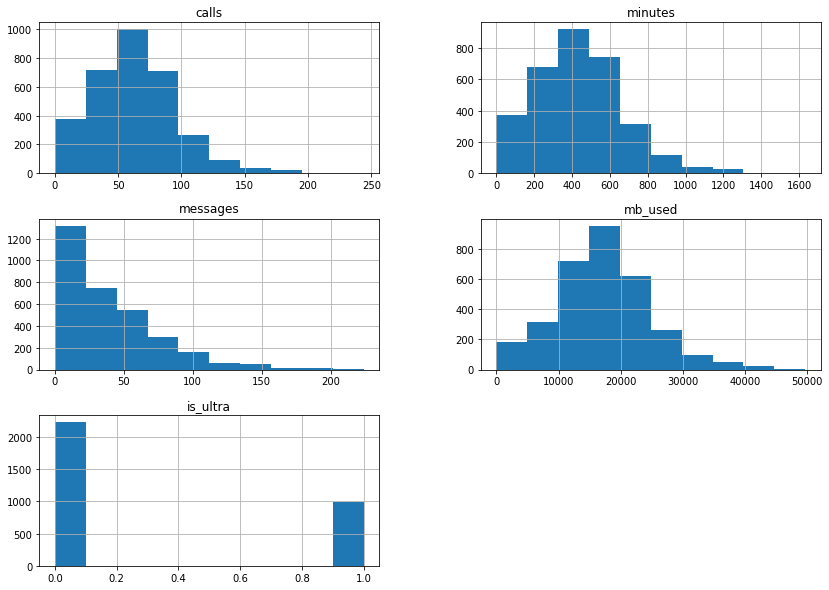

In [6]:
# Посмотрим на распредление величин
df.hist(column=df.columns, figsize=(14, 10))
None

In [7]:
#А теперь посмотрим на корреляции между фичами
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,calls,minutes,messages,mb_used,is_ultra
calls,1.00,0.98,0.18,0.29,0.21
minutes,0.98,1.00,0.17,0.28,0.21
messages,0.18,0.17,1.00,0.20,0.20
mb_used,0.29,0.28,0.20,1.00,0.20
is_ultra,0.21,0.21,0.20,0.20,1.00


In [8]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

### Вывод

Целевой признак (столбец "is_ultra") категориальный (принимает два значения 1 или 0), следовательно решается задача классификации. Так как категорий всего две то будкем решать задачу бинарной (двоичной) классификации.

Мы видим что признаким распределены нормально, но мы наблюдаем слабую корреляцию между целевым признаком и остальными, так что хорошую модель вполне можно и не построить.

### Разделение выборки

Сначала мы перетасуем весь набор данных (df.sample (frac = 1)), а затем разделим наш набор данных на следующие части:

60% - поездный набор

20% - проверочный набор

20% - тестовый набор

In [9]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

Проверим что все ОК

In [10]:
np.shape(train)

(1928, 5)

In [11]:
np.shape(validate)

(643, 5)

In [12]:
np.shape(test)

(643, 5)

In [13]:
df_train, test = train_test_split(df, test_size=0.2, random_state=12345, stratify=df['is_ultra'])

In [14]:
train, validate = train_test_split(df_train, test_size=0.2, random_state=12345, stratify=df_train['is_ultra'])

Извлеку признак и целевой признак

In [15]:
# Признак
features_train = train.drop(['calls', 'is_ultra'], axis=1)
features_validate = validate.drop(['calls', 'is_ultra'], axis=1)
features_test = test.drop(['calls', 'is_ultra'], axis=1)
# Целевой признак
target_train = train['is_ultra']
target_validate = validate['is_ultra']
target_test = test['is_ultra']

## Построение модели "Решающее древо"

In [16]:
best_model_tree = None
best_result_tree = 0
list_result_validate = []
list_result_train = []
for depth in range(1, 30):
    # обучаю модель с заданной глубиной дерева
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    # обучаю модель на тренировочной выборке
    model.fit(features_train, target_train)
    # получу предсказание модели на валидационной выборки
    predictions_train = model.predict(features_train)
    predictions_validate = model.predict(features_validate)
    result_train = accuracy_score(target_train, predictions_train)
    result_validate = accuracy_score(target_validate, predictions_validate) 
    list_result_validate.append(result_validate)
    list_result_train.append(result_train)
    if result_validate > best_result_tree:
        best_model_tree = model
        best_result_tree = result_validate
        best_depth = depth
print("Accuracy лучшей модели:", best_result_tree)
print("Максимальная глубина дерева лучшей модели:", best_depth)

Accuracy лучшей модели: 0.8116504854368932
Максимальная глубина дерева лучшей модели: 5


In [17]:
result_list_validate = pd.Series(list_result_validate, index=np.arange(1, 30))
result_list_train = pd.Series(list_result_train, index=np.arange(1, 30))

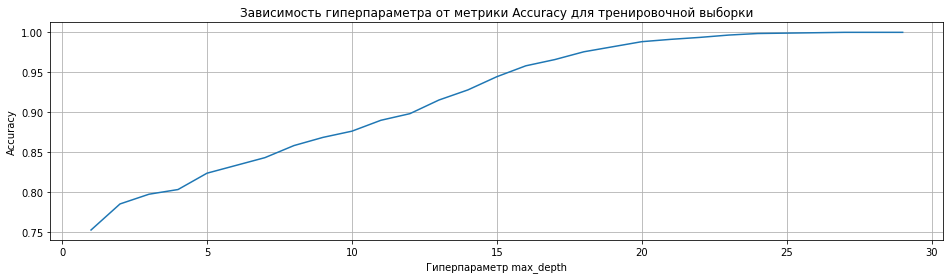

In [18]:
plt.figure(figsize=(16, 4))
plt.plot(result_list_train)
plt.grid()
plt.title("Зависимость гиперпараметра от метрики Accuracy для тренировочной выборки")
plt.xlabel("Гиперпараметр max_depth")
plt.ylabel("Accuracy")
plt.show()

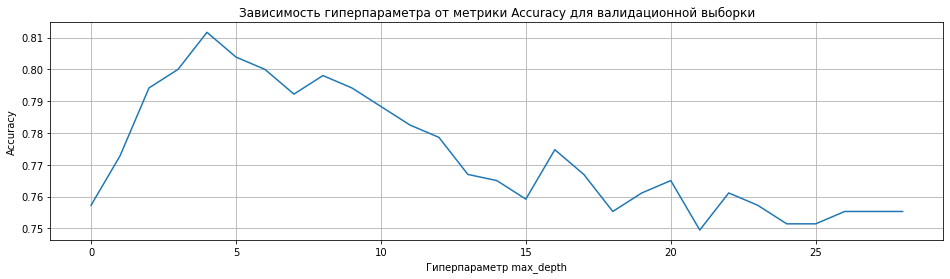

In [19]:
plt.figure(figsize=(16, 4))
plt.plot(list_result_validate)
plt.grid()
plt.title("Зависимость гиперпараметра от метрики Accuracy для валидационной выборки")
plt.xlabel("Гиперпараметр max_depth")
plt.ylabel("Accuracy")
plt.show()

1. На тренировочной выборке при изменении гиперпараметра метрика Accuracy увеличивается и в районе max_depth равное 25 стабилизируется. Здесь мы видим что наша модель начала обучатся и при значении гиперпараметра max_depth равное 25 наша модель дает стопроцентную долю правильных ответов. Модель слишком настроилось на тренировочную выборку. 
    
2. На валлидационной выборке максимальное значение Accuracy достигается при max_depth равное 5 дальше по мере увеличения глубины начинает падать это вызвано тем что модель переобучилась. То-есть внизу дерева где-то на большой глубине начинают появляться разбиения по менее важным признакам и в конце концов мы можем получить так, что предположим 0 минут это уже тариф "Ультра". 

## Построение модели "Случайный лес"

In [20]:
best_model_Rtree = None
best_result_tree = 0
best_est = 0
best_depth = 0
#Kоличеством деревьев: от 10 до 50 с шагом 10
for est in range(10, 51, 10):
#Максимальная глубина от 1 до 10
    for depth in range (1, 30):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        #Обучу модель на тренировочной выборке
        model.fit(features_train, target_train)
        # получу предсказание модели на валидационной выборки
        predictions = model.predict(features_validate)
        # посчитаю качество модели на валидационной выборке
        result = accuracy_score(target_validate, predictions)
        if result > best_result_tree:
            best_model_Rtree = model
            best_result = result
            best_depth = depth
            best_est = est
print("Accuracy лучшей модели:", best_result)
print("Максимальная глубина дерева лучшей модели:", best_depth)
print("Максимальное колличество деревьев лучшей модели:", best_est)

Accuracy лучшей модели: 0.7864077669902912
Максимальная глубина дерева лучшей модели: 29
Максимальное колличество деревьев лучшей модели: 50


1. Значение n_estimators модели по дефолту равно 10 я почему-то не задумался что это оптимальное значение.
    
2. И найду лучшую модель методом GridSearch. 

Установим значение параметров:

<b>n_estimators</b> - число деревьев в лесу, оно будет измеряться от значения по дефолту раное 10 до 50 с шагом 10.

<b>max_depth</b> - глубина дерева, будет измерятся от 1 до 30 с шагом равным 2.

<b>min_samples_leaf</b> - минимальное число образцов листа, будет изменятся от 1 до 7.

<b>min_samples_spliat</b> - минимальное число образцов для сплита, будет измерятся от 2 до 9.


In [21]:
parametrs = {'n_estimators': range(10, 51, 10),
            'max_depth': range(1, 30, 2)}

In [22]:
model = RandomForestClassifier(random_state=12345, n_jobs = -1)
grid = GridSearchCV(model, parametrs, cv=5)

Выборка df_train это будет наша тренировочная выборка она получена в самом начале исследования путем деления исходного датасета на две выборки - тестовую и тренировочную. Выберу в df_train таргет и фичи.

In [23]:
features_df_train = df_train.drop(['calls', 'is_ultra'], axis=1)
target_df_train = df_train['is_ultra']

In [24]:
grid.fit(features_df_train, target_df_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=12345),
             param_grid={'max_depth': range(1, 30, 2),
                         'n_estimators': range(10, 51, 10)})

С поммощью grid.best_estimator_ посмотрим на оптимальные параметры для RandomForestClassifier

In [25]:
grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=50, n_jobs=-1,
                       random_state=12345)

В best_model_Rtree положим оптимальную модель

In [26]:
grid.best_score_ = best_model_Rtree

In [27]:
predictions = best_model_Rtree.predict(features_validate)
result = accuracy_score(target_validate, predictions)
result

0.7864077669902912

## Построение модели "Логистическая регрессия"

In [28]:
model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_log.fit(features_train, target_train)
predictions = model_log.predict(features_validate)
result = accuracy_score(target_validate, predictions)
print("Accuracy:", result)

Accuracy: 0.7456310679611651


Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области. Если признаки  хоршошо коррелируют друг с другом то модель на тренировочной выборке может оптимально разделить исходное пространство на две области.  

Проанализировав три модели по показателю Accuracy лучшей моделью явилась модель "Решающего дерева" с показателем равным 0.811 и гиперпарраметром равным 5.

## Проверка модели на  выборкe test 

**Модель "Решающее дерево"**

In [29]:
predictions = best_model_tree.predict(features_test)
result = accuracy_score(target_test, predictions)
print("Accuracy:", result)

Accuracy: 0.8055987558320373


На тестовой выборке модель предсказада долю правильных ответов в 80,5%

## Вывод 

1. Построили три модели "Рещающее дерево", "Случайный лес", "Логистическая регрессия"
2. Настроили модели на валидационном датасете. На основании метрики Accuracy (доля правильных ответов) расставили модели в порядке предсказания доли правильных данных на валидационной выборке 1 место - "Решающее дерево" (доля правильных ответов 81%, 2 место - "Случайный лес" (доля правильных ответов 78), 3 место - Логистическая регрессия (доля правильных ответов 70,1).
3. Проверили наши модели на тестовой выборке (1 место - "Случайный лес" (доля правильных ответов 79,9%, 2 место - "Решающее дерево" (доля правильных ответов 79,6), 3 место - Логистическая регрессия (доля правильных ответов 74,5).
4. В тестовой выборке модель "Решающее дерево" предсказала долю правильных ответов в 80,5% случаях.